<a href="https://colab.research.google.com/github/kazirafi17/DogVsCatClassifier/blob/main/CatDogCNNClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name : CatDog CNN Classifier**

Description: In this project, I'll develope a cat-dog image classifier using Convolutional Neural Networks (CNNs) and transfer learning. CNNs are highly effective in image recognition tasks due to their ability to automatically detect and learn relevant features from images. Transfer learning further enhances the model's performance by leveraging pre-trained networks, allowing the classifier to achieve high accuracy even with a limited dataset. This approach is crucial as it reduces training time and computational resources while improving the model's generalization to new data. The result is a robust classifier that can accurately distinguish between cats and dogs.

## Import Libraries and framework

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16  import VGG16
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Load/Import and Read the datasets

In [ ]:
!mkdir -p ~/.kaggle # Create a .kaggle directory
!cp kaggle.json ~/.kaggle/ # Copy the kaggle.json file into the .kaggle directory
!chmod 600 ~/.kaggle/kaggle.json # Set appropriate permissions on the kaggle.json file to secure credentials

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats # Download the "Dogs vs. Cats" dataset from Kaggle

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:50<00:00, 21.4MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.8MB/s]


In [ ]:
# Create a ZipFile object to open the ZIP file located at '/content/dogs-vs-cats.zip' in read mode ('r')
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')

# Extract all contents of the ZIP file into the specified directory ('/content')
zip_ref.extractall('/content')

# Close the ZipFile object to free up resources
zip_ref.close()

## Data Cleaning and Preprocessing

#### Explore the datasets

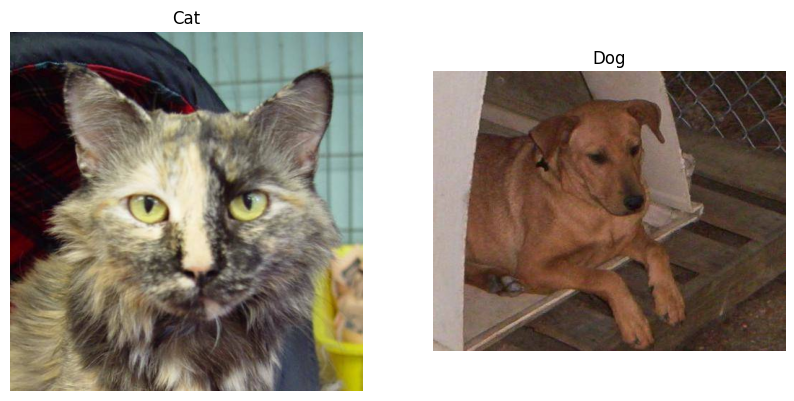

In [ ]:

# Load the images
img1 = mpimg.imread('/content/test/cats/cat.10.jpg')
img2 = mpimg.imread('/content/test/dogs/dog.100.jpg')

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Display the first image
axes[0].imshow(img1)
axes[0].axis('off')  # Hide the axis for a cleaner look
axes[0].set_title('Cat')  # Optional: Add a title for clarity

# Display the second image
axes[1].imshow(img2)
axes[1].axis('off')  # Hide the axis for a cleaner look
axes[1].set_title('Dog')  # Optional: Add a title for clarity

# Show the plot with both images
plt.show()


In [ ]:
print(img1.shape)
print(img2.shape)

(499, 489, 3)
(397, 500, 3)


Images are in different shape.

# Building the Convolutional Neural Network

In [ ]:
# Initialize the VGG16 model with pre-trained weights

conv_base = VGG16(
    weights='imagenet',        # Use weights pre-trained on the ImageNet dataset
    include_top=False,         # Exclude the fully connected layers at the top of the network
    input_shape=(150, 150, 3)  # Define the shape of the input tensor (150x150 pixels, 3 color channels)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Display a summary of the convolutional base architecture, showing the layers, output shapes, and the number of parameters

conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set the entire convolutional base to be trainable
conv_base.trainable = True

# Initialize a flag to determine when to start training the layers
set_trainable = False

# Loop through all layers in the convolutional base
for layer in conv_base.layers:
    # When reaching the layer named 'block5_conv1', start making layers trainable
    if layer.name == 'block5_conv1':
        set_trainable = True

    # If the flag is set to True, make the layer trainable, otherwise freeze it
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Loop through all layers again to print the name and trainable status of each layer
for layer in conv_base.layers:
    print(layer.name, layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
# Initialize a Sequential model
model = Sequential()

model.add(conv_base) # Add the pre-trained convolutional base to the model
model.add(Flatten()) # Flatten the output of the convolutional base to convert it into a 1D vector
model.add(Dense(256,activation='relu')) # Add a Dense layer with 256 units and ReLU activation
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # Normalize pixel values to [0, 1]

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# Compile the model with the specified configurations
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 182s 269ms/step - accuracy: 0.8311 - loss: 0.3600 - val_accuracy: 0.9350 - val_loss: 0.1616
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 184s 257ms/step - accuracy: 0.9238 - loss: 0.1808 - val_accuracy: 0.9484 - val_loss: 0.1381
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 252ms/step - accuracy: 0.9404 - loss: 0.1468 - val_accuracy: 0.9516 - val_loss: 0.1245
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 213s 268ms/step - accuracy: 0.9519 - loss: 0.1202 - val_accuracy: 0.9478 - val_loss: 0.1261
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 274ms/step - accuracy: 0.9536 - loss: 0.1099 - val_accuracy: 0.9556 - val_loss: 0.1097


**Accuracy: 0.9536   |   val_accuracy: 0.9556**



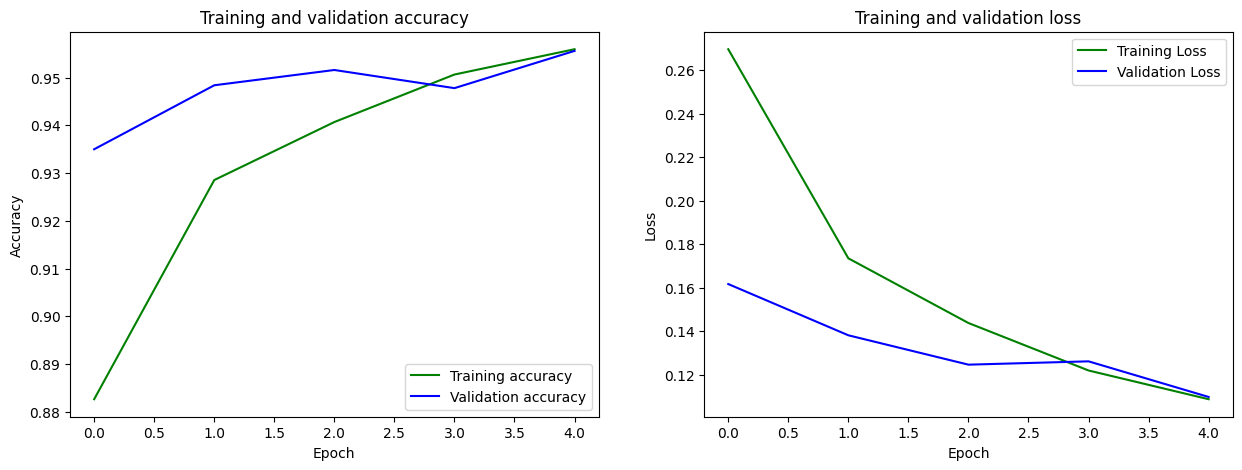

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

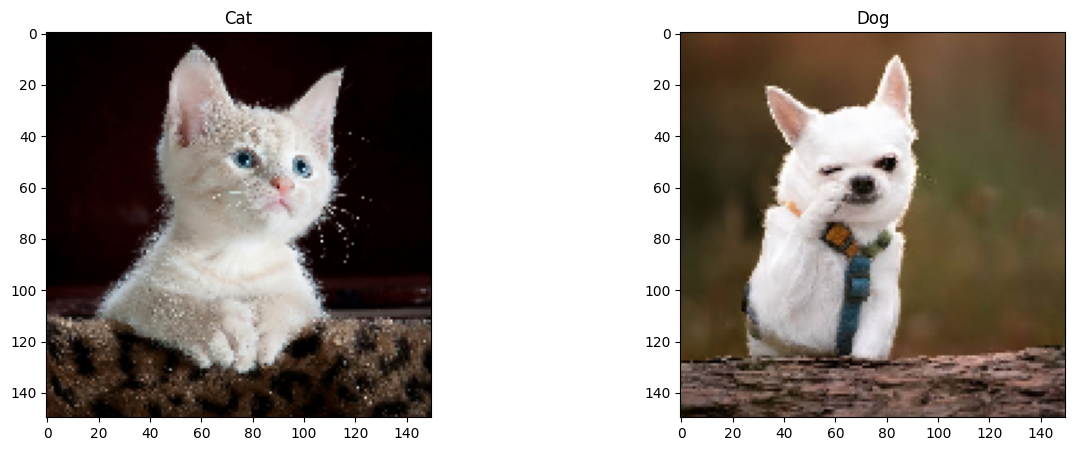

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Paths to the images
img1_path = '/content/Cat.jpeg'
img2_path = '/content/Dog.jpg'

# Load the images with target size (same as used in training)
img1 = image.load_img(img1_path, target_size=(150, 150))
img2 = image.load_img(img2_path, target_size=(150, 150))

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Display the first image (Cat.jpeg)
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Cat")

# Display the second image (Dog.jpg)
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Dog")

# Show the plot
plt.show()


In [ ]:
# Pass these images through your model to get predictions
pred1 = model.predict(img1_array)
pred2 = model.predict(img2_array)

# Print the prediction results
print(f'Prediction for img1 (Cat.jpeg): {pred1}')
print(f'Prediction for img2 (Dog.jpg): {pred2}')
# Interpret the predictions
def interpret_prediction(pred):
    if pred > 0.5:
        return "It's a Dog!"
    else:
        return "It's a Cat!"

print(interpret_prediction(pred1[0]))
print(interpret_prediction(pred2[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction for img1 (Cat.jpeg): [[1.794504e-05]]
Prediction for img2 (Dog.jpg): [[0.6334416]]
It's a Cat!
It's a Dog!
